# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.011890e+01     6.205494e+00
 * time: 0.004300832748413086
     1     2.697284e+01     4.674512e+00
 * time: 0.012642860412597656
     2     2.054881e+01     5.310909e+00
 * time: 0.03248190879821777
     3     1.235627e+01     1.658525e+00
 * time: 0.05576586723327637
     4     1.158974e+01     3.071331e+00
 * time: 0.1583540439605713
     5     1.094961e+01     1.725130e+00
 * time: 0.17401695251464844
     6     1.037371e+01     2.089289e+00
 * time: 0.18921399116516113
     7     9.715910e+00     1.272474e+00
 * time: 0.20456790924072266
     8     9.117392e+00     8.822536e-01
 * time: 0.21965503692626953
     9     8.800025e+00     6.203741e-01
 * time: 0.23487401008605957
    10     8.629959e+00     6.982926e-01
 * time: 0.2502579689025879
    11     8.625494e+00     1.053727e+00
 * time: 0.2615540027618408
    12     8.514906e+00     7.412401e-01
 * time: 0.27280592918395996
    13     8.396550e+00     4.590191e-01
 * time: 

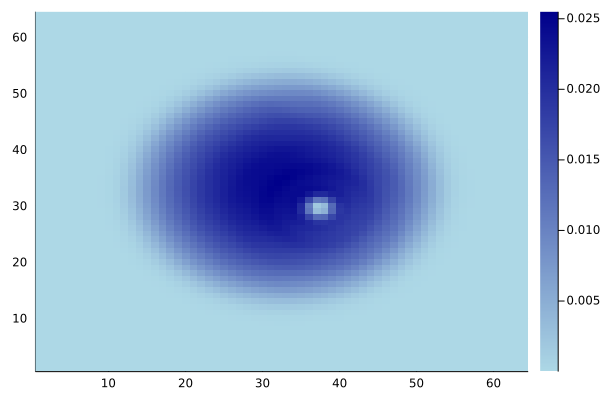

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)